'''
-*- coding:utf-8 -*-
@author:  Huaiyu Dong  ＆ Yixing Huang
@Time: 2023-10-10
@Explanition: This code aims to predict the EAB of meatamaterial using the          autoencoder stack DNN neural network architecture.
'''

###归一化+有数据增强功能###
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler

# Set random seed for PyTorch and NumPy
seed = 14618
torch.manual_seed(seed)
np.random.seed(seed)

# Load your data from mydata_petals.csv
data = pd.read_csv('mydata_petals.csv')

# Extract the last column (EAB) as the target variable
EAB = data.iloc[:, -1].values

# Extract the first 10 columns as input features
input = data.iloc[:, :-1].values

# Data Augmentation: Create additional samples through bootstrapping
n_samples = len(EAB)
n_additional_samples = 2000 # Number of additional samples to create (adjust as needed)
additional_samples_indices = np.random.choice(n_samples, n_additional_samples, replace=True)

additional_input = input[additional_samples_indices]
additional_EAB = EAB[additional_samples_indices]

# Concatenate the additional data with the original data
input = np.vstack((input, additional_input))
EAB = np.hstack((EAB, additional_EAB))

# Create MinMaxScaler objects for input and EAB
scaler_in = MinMaxScaler(feature_range=(-0.5, 0.5))
scaler_out = MinMaxScaler(feature_range=(-0.99, 0.99))

# Fit and transform input data, and store the transformation matrix ps_in
p_scaled = scaler_in.fit_transform(input)
p = torch.FloatTensor(p_scaled.T)
ps_in = scaler_in.scale_

# Fit and transform EAB data, and store the transformation matrix ts_out
t_scaled = scaler_out.fit_transform(EAB.reshape(-1, 1))
t = torch.FloatTensor(t_scaled)
ts_out = scaler_out.scale_

print("Scaled Data Shapes:")
print(p_scaled.shape)
print(t_scaled.shape)

# Define the ratio for training and testing data
train_ratio = 0.8  # 80% training data, 20% testing data
test_ratio = 0.2

# Number of samples
n_samples = len(EAB)

# Create a random permutation of indices for shuffling
indices = np.random.permutation(n_samples)

# Calculate the sizes of the training and test sets
n_train = int(train_ratio * n_samples)
n_test = n_samples - n_train

# Use the shuffled indices to split the data into training and test sets
train_indices = indices[:n_train]
test_indices = indices[n_train:]

# Split the data into training and test sets based on the shuffled indices
X_train, y_train = p_scaled[train_indices], t_scaled[train_indices]
X_test, y_test = p_scaled[test_indices], t_scaled[test_indices]

print("Training Data Shapes:")
print(X_train.shape, y_train.shape)
print("Test Data Shapes:")
print(X_test.shape, y_test.shape)

# Print the first 5 rows of training and test data
print("First 5 rows of Training Data:")
print(X_train[:5])
print("First 5 rows of Training Target (y_train):")
print(y_train[:5])

print("First 5 rows of Test Data:")
print(X_test[:5])
print("First 5 rows of Test Target (y_test):")
print(y_test[:5])

In [1]:
###归一化、无数据增强功能###
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler

# Set random seed for PyTorch and NumPy
#seed = 42
#torch.manual_seed(seed)
#np.random.seed(seed)

# Load your data from mydata_petals.csv
data = pd.read_csv('mydata_petals.csv')

# Extract the last column (EAB) as the target variable
EAB = data.iloc[:, -1].values

# Extract the first 10 columns as input features
input = data.iloc[:, :-1].values

# Create MinMaxScaler objects for input and EAB
scaler_in = MinMaxScaler(feature_range=(-0.5, 0.5))
scaler_out = MinMaxScaler(feature_range=(-0.99, 0.99))

# Fit and transform input data, and store the transformation matrix ps_in
p_scaled = scaler_in.fit_transform(input)
p = torch.FloatTensor(p_scaled.T)
ps_in = scaler_in.scale_

# Fit and transform EAB data, and store the transformation matrix ts_out
t_scaled = scaler_out.fit_transform(EAB.reshape(-1, 1))
t = torch.FloatTensor(t_scaled)
ts_out = scaler_out.scale_

print("Scaled Data Shapes:")
print(p_scaled.shape)
print(t_scaled.shape)

# Define the ratio for training and testing data
train_ratio = 0.8  # 80% training data, 20% testing data
test_ratio = 0.2

# Number of samples
n_samples = len(EAB)

# Create a random permutation of indices for shuffling
indices = np.random.permutation(n_samples)

# Calculate the sizes of the training and test sets
n_train = int(train_ratio * n_samples)
n_test = n_samples - n_train

# Use the shuffled indices to split the data into training and test sets
train_indices = indices[:n_train]
test_indices = indices[n_train:]

# Split the data into training and test sets based on the shuffled indices
X_train, y_train = p_scaled[train_indices], t_scaled[train_indices]
X_test, y_test = p_scaled[test_indices], t_scaled[test_indices]

print("Training Data Shapes:")
print(X_train.shape, y_train.shape)
print("Test Data Shapes:")
print(X_test.shape, y_test.shape)

# 打印训练数据前五行
print("First 5 rows of Training Data:")
print(X_train[:5])
print("First 5 rows of Training Target (y_train):")
print(y_train[:5])

print("Test Data Shapes:")
print(X_test.shape, y_test.shape)

# 打印测试数据前五行
print("First 5 rows of Test Data:")
print(X_test[:5])
print("First 5 rows of Test Target (y_test):")
print(y_test[:5])

Scaled Data Shapes:
(2000, 10)
(2000, 1)
Training Data Shapes:
(1600, 10) (1600, 1)
Test Data Shapes:
(400, 10) (400, 1)
First 5 rows of Training Data:
[[ 0.28767515  0.26804511  0.3906688   0.3385     -0.46791249  0.33925642
  -0.28467419 -0.17304189  0.40091075 -0.48035292]
 [ 0.42236202 -0.3320802   0.00901081  0.295       0.37857794  0.20348095
   0.31106662  0.33661202  0.41056466 -0.3724759 ]
 [-0.47068916 -0.31365915 -0.469163    0.19       -0.28012762 -0.15135775
   0.07298871 -0.23151184  0.49326047 -0.38248135]
 [ 0.35587647 -0.36842105  0.01902283 -0.0175     -0.09598906 -0.36586477
  -0.36002912  0.4848816  -0.48615665 -0.2105694 ]
 [ 0.39776952  0.49874687 -0.27412895  0.131       0.12096627 -0.40741753
   0.17000364 -0.00145719 -0.29052823 -0.15799527]]
First 5 rows of Training Target (y_train):
[[ 0.29373626]
 [ 0.7289011 ]
 [-0.14142857]
 [ 0.11967033]
 [-0.29373626]]
Test Data Shapes:
(400, 10) (400, 1)
First 5 rows of Test Data:
[[ 0.42064627  0.06804511  0.48998799  

###无特征缩放###
import pandas as pd
import numpy as np
import torch

# Set random seed for PyTorch and NumPy
seed = 14618
torch.manual_seed(seed)
np.random.seed(seed)

# Load your data from mydata_petals.csv
data = pd.read_csv('mydata_petals.csv')

# Extract the last column (EAB) as the target variable
EAB = data.iloc[:, -1].values

# Extract the first 10 columns as input features
input = data.iloc[:, :-1].values

# No normalization/scaling is applied to input and EAB

print("Data Shapes:")
print(input.shape, EAB.shape)

# Define the ratio for training and testing data
train_ratio = 0.8  # 80% training data, 20% testing data
test_ratio = 0.2

# Number of samples
n_samples = len(EAB)

# Create a random permutation of indices for shuffling
indices = np.random.permutation(n_samples)

# Calculate the sizes of the training and test sets
n_train = int(train_ratio * n_samples)
n_test = n_samples - n_train

# Use the shuffled indices to split the data into training and test sets
train_indices = indices[:n_train]
test_indices = indices[n_train:]

# Split the data into training and test sets based on the shuffled indices
X_train, y_train = input[train_indices], EAB[train_indices]
X_test, y_test = input[test_indices], EAB[test_indices]

print("Training Data Shapes:")
print(X_train.shape, y_train.shape)
print("Test Data Shapes:")
print(X_test.shape, y_test.shape)


Training:  26%|█████████████████▉                                                    | 77/300 [00:00<00:00, 264.83it/s]

torch.Size([1600, 14])
torch.Size([1600, 12])
torch.Size([1600, 8])
torch.Size([1600, 3])
torch.Size([1600, 1])


Training: 100%|█████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 467.79it/s]


Training time: 0.64 seconds


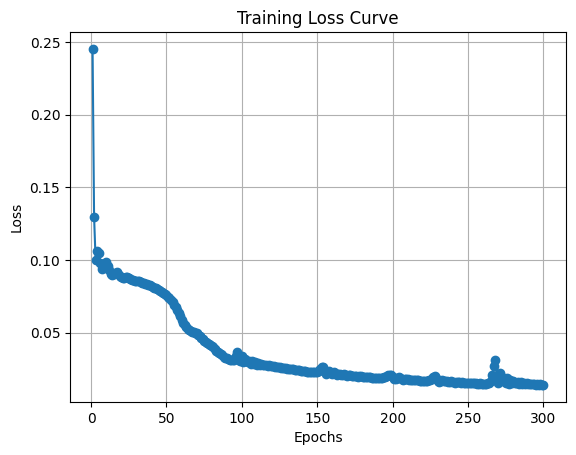

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
#训练 ：记录二维损失曲线#
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import optuna

max_epochs_dnn = 300
kk1 = 14  # Neuron number in 1st hidden layer 
kk2 = 12  # Neuron number in 2nd hidden layer
kk3 = 8  # Neuron number in 3rd hidden layer
kk4 = 3  # Neuron number in 4th hidden layer

max_epochs_autoencoder = 20
lr_autoencoder = 0.02
#seed = 14618                # Set random seed for NumPy
#torch.manual_seed(seed)
#np.random.seed(seed)
# Initialize a progress bar

pbar = tqdm(total=max_epochs_dnn, desc="Training")

start_time = time.time()# Training loop

# 构建第一个自动编码器：10-(12)-10
class AutoEncoder1(nn.Module):
    def __init__(self):
        super(AutoEncoder1, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(10, kk1),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            nn.Linear(kk1, 10),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# 创建AutoEncoder1实例
autoencoder1 = AutoEncoder1()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer_autoencoder1 = optim.Adam(autoencoder1.parameters(), lr=lr_autoencoder)

inputs_autoencoder1 = torch.FloatTensor(X_train)
# 训练AutoEncoder1

for epoch in range(max_epochs_autoencoder): 
    # 梯度置零
    optimizer_autoencoder1.zero_grad()
    
    # 前向传播
    outputs = autoencoder1(inputs_autoencoder1)
    
    # 计算损失
    loss = criterion(outputs, inputs_autoencoder1)
    
    # 反向传播和优化
    loss.backward(retain_graph=True)
    optimizer_autoencoder1.step()
    
    # 打印损失
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch + 1}/{max_epochs_autoencoder}], Loss: {loss.item():.4f}")
encoded_data_autoencoder1 = autoencoder1.encoder(inputs_autoencoder1)
print(encoded_data_autoencoder1.shape)

#seed = 14618                # Set random seed for NumPy
#torch.manual_seed(seed)
#np.random.seed(seed)

# 构建第二个自动编码器：12-(10)-12
class AutoEncoder2(nn.Module):
    def __init__(self):
        super(AutoEncoder2, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(kk1, kk2),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            nn.Linear(kk2, kk1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 创建AutoEncoder2实例
autoencoder2= AutoEncoder2()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer_autoencoder2 = optim.Adam(autoencoder2.parameters(), lr= lr_autoencoder)

inputs_autoencoder2 = encoded_data_autoencoder1
# 训练AutoEncoder1

for epoch in range(max_epochs_autoencoder): 
    # 梯度置零
    optimizer_autoencoder2.zero_grad()
    
    # 前向传播
    outputs = autoencoder2(inputs_autoencoder2)
    
    # 计算损失
    loss = criterion(outputs, inputs_autoencoder2)
    
    # 反向传播和优化
    loss.backward(retain_graph=True)
    optimizer_autoencoder2.step()
    
    # 打印损失
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch + 1}/{max_epochs_autoencoder}], Loss: {loss.item():.4f}")
encoded_data_autoencoder2 = autoencoder2.encoder(inputs_autoencoder2)
print(encoded_data_autoencoder2.shape)

#seed = 14618                # Set random seed for NumPy
#torch.manual_seed(seed)
#np.random.seed(seed)

# 构建第三个自动编码器：10-(6)-10
class AutoEncoder3(nn.Module):
    def __init__(self):
        super(AutoEncoder3, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(kk2, kk3),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            nn.Linear(kk3, kk2),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
import torch.optim as optim

# 创建AutoEncoder3实例
autoencoder3= AutoEncoder3()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer_autoencoder3 = optim.Adam(autoencoder3.parameters(), lr=lr_autoencoder)

inputs_autoencoder3 = encoded_data_autoencoder2
# 训练AutoEncoder1
for epoch in range(max_epochs_autoencoder): 
    # 梯度置零
    optimizer_autoencoder3.zero_grad()
    
    # 前向传播
    outputs = autoencoder3(inputs_autoencoder3)
    
    # 计算损失
    loss = criterion(outputs, inputs_autoencoder3)
    
    # 反向传播和优化
    loss.backward(retain_graph=True)
    optimizer_autoencoder3.step()
    
    # 打印损失
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch + 1}/{max_epochs_autoencoder}], Loss: {loss.item():.4f}")
encoded_data_autoencoder3 = autoencoder3.encoder(inputs_autoencoder3)
print(encoded_data_autoencoder3.shape)

#seed = 14618                # Set random seed for NumPy
#torch.manual_seed(seed)
#np.random.seed(seed)

# 构建第四个自动编码器：6-(3)-6
class AutoEncoder4(nn.Module):
    def __init__(self):
        super(AutoEncoder4, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(kk3, kk4),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            nn.Linear(kk4, kk3),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
import torch.optim as optim

# 创建AutoEncoder4实例
autoencoder4= AutoEncoder4()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer_autoencoder4 = optim.Adam(autoencoder4.parameters(), lr=lr_autoencoder)

inputs_autoencoder4 = encoded_data_autoencoder3
# 训练AutoEncoder1
for epoch in range(max_epochs_autoencoder): 
    # 梯度置零
    optimizer_autoencoder4.zero_grad()
    
    # 前向传播
    outputs = autoencoder4(inputs_autoencoder4)
    
    # 计算损失
    loss = criterion(outputs, inputs_autoencoder4)
    
    # 反向传播和优化
    loss.backward(retain_graph=True)
    optimizer_autoencoder4.step()
    
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch + 1}/{max_epochs_autoencoder}], Loss: {loss.item():.4f}")
encoded_data_autoencoder4 = autoencoder4.encoder(inputs_autoencoder4)
print(encoded_data_autoencoder4.shape)

#seed = 14618                # Set random seed for NumPy
#torch.manual_seed(seed)
#np.random.seed(seed)

# 构建第五个自动编码器：3-(1)-3
class AutoEncoder5(nn.Module):
    def __init__(self):
        super(AutoEncoder5, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(kk4, 1),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            nn.Linear(1, kk4),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# 创建AutoEncoder5实例
autoencoder5= AutoEncoder5()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer_autoencoder5 = optim.Adam(autoencoder5.parameters(), lr=lr_autoencoder)

inputs_autoencoder5 = encoded_data_autoencoder4
# 训练AutoEncoder1

for epoch in range(max_epochs_autoencoder): 
    # 梯度置零
    optimizer_autoencoder5.zero_grad()
    
    # 前向传播
    outputs = autoencoder5(inputs_autoencoder5)
    
    # 计算损失
    loss = criterion(outputs, inputs_autoencoder5)
    
    # 反向传播和优化
    loss.backward(retain_graph=True)
    optimizer_autoencoder5.step()
    
    # 打印损失
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch + 1}/{max_epochs_autoencoder}], Loss: {loss.item():.4f}")
encoded_data_autoencoder5 = autoencoder5.encoder(inputs_autoencoder5)
print(encoded_data_autoencoder5.shape)

# Define the architecture of the DNN with 4 hidden layers
class DNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dims):
        super(DNN, self).__init__()
        dims = [input_dim] + hidden_dims + [output_dim]
        self.layers = nn.ModuleList()
        for i in range(1, len(dims)):
            self.layers.append(nn.Linear(dims[i - 1], dims[i]))
            if i < len(dims) - 1:
                self.layers.append(nn.Tanh())

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Hyperparameters
input_dim = 10  # Input dimension
output_dim = 1  # Output dimension
hidden_dims = [kk1, kk2, kk3, kk4]  # Hidden layer dimensions
# Initialize the DNN using the autoencoder initialization
dnn = DNN(input_dim, output_dim, hidden_dims)
dnn.layers[0].weight.data = autoencoder1.encoder[0].weight.float()
dnn.layers[0].bias.data = autoencoder1.encoder[0].bias.float()

dnn.layers[2].weight.data = autoencoder2.encoder[0].weight.float()
dnn.layers[2].bias.data = autoencoder2.encoder[0].bias.float()

dnn.layers[4].weight.data = autoencoder3.encoder[0].weight.float()
dnn.layers[4].bias.data = autoencoder3.encoder[0].bias.float()

dnn.layers[6].weight.data = autoencoder4.encoder[0].weight.float()
dnn.layers[6].bias.data = autoencoder4.encoder[0].bias.float()

dnn.layers[8].weight.data = autoencoder5.encoder[0].weight.float()
dnn.layers[8].bias.data = autoencoder5.encoder[0].bias.float()



#seed = 14618               #
#torch.manual_seed(seed)
#np.random.seed(seed)

# Define the optimizer and loss function
optimizer = optim.Adam(dnn.parameters(), lr=0.02)
criterion = nn.MSELoss()

# Prepare data
inputs_dnn = torch.FloatTensor(X_train)  # Input data
targets = torch.FloatTensor(y_train)  # Target data

# Train the DNN

losses = []  # To store the loss values

# Initialize lists to store the gradient descent path
epoch_list = []  # To store the epoch at each step
loss_list = []  # To store the loss at each step

for epoch in range(max_epochs_dnn):
    # Zero the gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = dnn(inputs_dnn)
    
    # Calculate the loss
    loss = criterion(outputs, targets)
    losses.append(loss.item())
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Update the progress bar
    pbar.update(1)
    
    epoch_list.append(epoch) # Record the epoch and loss at each step for the gradient descent path
    loss_list.append(loss.item())
    # Display loss every 100 epochs
    if (epoch + 1) % 1000== 0:
        print(f"Epoch [{epoch + 1}/{max_epochs_dnn}], Loss: {loss.item():.4f}")

# Close the progress bar
pbar.close()

# Calculate training time
end_time = time.time()
training_time = end_time - start_time
# Print training time
print(f"Training time: {training_time:.2f} seconds")

# Plot the loss curve
plt.plot(range(1, max_epochs_dnn + 1), losses, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()
#torch.save(dnn, 'dnn_model_petals.pth') #保存

R-squared (r_train) on training set: 0.859
Mean Absolute Error (MAE) on training set: 0.094
Mean Squared Error (MSE) on training set: 0.014
Root Mean Squared Error (RMSE) on training set: 0.119
R-squared (r_test) on test set: 0.818
Mean Absolute Error (MAE) on test set: 0.105
Mean Squared Error (MSE) on test set: 0.018
Root Mean Squared Error (RMSE) on test set: 0.133


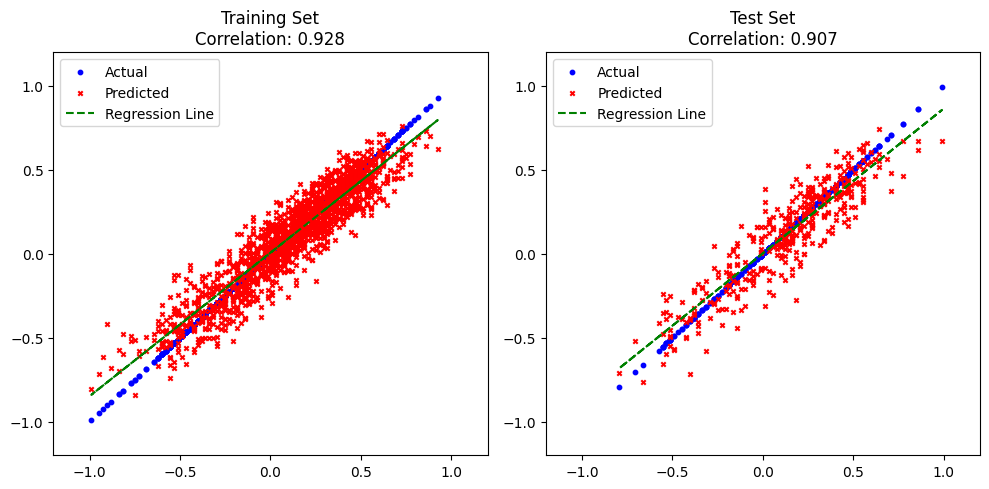

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
with torch.no_grad():
    predicted_train = dnn(torch.FloatTensor(X_train))
    train_true_values = y_train
    r_train = r2_score(train_true_values, predicted_train)
    mae_train = mean_absolute_error(train_true_values, predicted_train)   # MAE training set
    mse_train = mean_squared_error(train_true_values, predicted_train)    # MSE training set
    rmse_train = math.sqrt(mse_train)                               # RMSE training set

print(f"R-squared (r_train) on training set: {r_train:.3f}")
print(f"Mean Absolute Error (MAE) on training set: {mae_train:.3f}")
print(f"Mean Squared Error (MSE) on training set: {mse_train:.3f}")
print(f"Root Mean Squared Error (RMSE) on training set: {rmse_train:.3f}")

with torch.no_grad():              # Perform regression analysis on the test set (X_test, y_test)
    predicted_test = dnn(torch.FloatTensor(X_test))
    test_true_values = y_test
    r_test = r2_score(test_true_values, predicted_test)
    mae_test = mean_absolute_error(test_true_values, predicted_test)   #MAE test set
    mse_test = mean_squared_error(test_true_values, predicted_test)    # MSE test set
    rmse_test = math.sqrt(mse_test)                               #RMSE test set
    predicted_train = dnn(torch.FloatTensor(X_train))

print(f"R-squared (r_test) on test set: {r_test:.3f}")
print(f"Mean Absolute Error (MAE) on test set: {mae_test:.3f}")
print(f"Mean Squared Error (MSE) on test set: {mse_test:.3f}")
print(f"Root Mean Squared Error (RMSE) on test set: {rmse_test:.3f}")
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

actual_train = y_train
actual_test = y_test  # Replace 'y_test' with your test labels

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot of actual values and regression line for training set
axes[0].scatter(actual_train, actual_train, color='blue', label='Actual', marker='o', s=10)
axes[0].scatter(actual_train, predicted_train, color='red', label='Predicted', marker='x', s=10)
axes[0].set_xlim(-1.2, 1.2)
axes[0].set_ylim(-1.2, 1.2)
correlation_train = np.corrcoef(actual_train, predicted_train, rowvar=False)[0, 1]
axes[0].set_title(f'Training Set\nCorrelation: {correlation_train:.3f}')
regression_train = LinearRegression()
regression_train.fit(actual_train.reshape(-1, 1), predicted_train)
regression_line_train = regression_train.predict(actual_train.reshape(-1, 1))
axes[0].plot(actual_train, regression_line_train, color='green', linestyle='--', label='Regression Line')
axes[0].legend()

# Scatter plot of actual values and regression line for test set
axes[1].scatter(actual_test, actual_test, color='blue', label='Actual', marker='o', s=10)
axes[1].scatter(actual_test, predicted_test, color='red', label='Predicted', marker='x', s=10)
axes[1].set_xlim(-1.2, 1.2)
axes[1].set_ylim(-1.2, 1.2)
correlation_test = np.corrcoef(actual_test, predicted_test, rowvar=False)[0, 1]
axes[1].set_title(f'Test Set\nCorrelation: {correlation_test:.3f}')
regression_test = LinearRegression()
regression_test.fit(actual_test.reshape(-1, 1), predicted_test)
regression_line_test = regression_test.predict(actual_test.reshape(-1, 1))
axes[1].plot(actual_test, regression_line_test, color='green', linestyle='--', label='Regression Line')
axes[1].legend()
plt.tight_layout()
plt.show()

#训练 ：记录二维损失曲线#
import time
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import optuna

seed = 14618
torch.manual_seed(seed)
# Set random seed for NumPy
np.random.seed(seed)

# Define the optimizer and loss function
optimizer = optim.Adam(dnn.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Prepare data
inputs_dnn = torch.FloatTensor(X_train)  # Input data
targets = torch.FloatTensor(y_train)  # Target data

# Train the DNN
max_epochs_dnn = maxium_epochs_net0
losses = []  # To store the loss values

# Initialize a progress bar
pbar = tqdm(total=max_epochs_dnn, desc="Training")

# Initialize lists to store the gradient descent path
epoch_list = []  # To store the epoch at each step
loss_list = []  # To store the loss at each step

# Training loop
start_time = time.time()
for epoch in range(max_epochs_dnn):
    # Zero the gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = dnn(inputs_dnn)
    
    # Calculate the loss
    loss = criterion(outputs, targets)
    losses.append(loss.item())
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Update the progress bar
    pbar.update(1)
    
    epoch_list.append(epoch) # Record the epoch and loss at each step for the gradient descent path
    loss_list.append(loss.item())
    # Display loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{max_epochs_dnn}], Loss: {loss.item():.4f}")

# Close the progress bar
pbar.close()

# Calculate training time
end_time = time.time()
training_time = end_time - start_time

# Plot the loss curve
plt.plot(range(1, max_epochs_dnn + 1), losses, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

# Print training time
print(f"Training time: {training_time:.2f} seconds")

#torch.save(dnn, 'dnn_model_petals.pth') #保存